In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score_1-100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            200 non-null    int64 
 1   Gender                200 non-null    object
 2   Age                   200 non-null    int64 
 3   Annual Income (k$)    200 non-null    int64 
 4   Spending Score_1-100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score_1-100'],
      dtype='object')

In [5]:
df.columns = ["Cust_id", "gender", "age", "income", "score"]

In [6]:
df1 = df[['age',"income","score"]]
df1.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
df1.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dat = scaler.fit_transform(df1)

In [9]:
print(dat[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans (n_clusters = 5, random_state = 0).fit(dat)

In [12]:
kmeans.cluster_centers_

array([[ 0.07333084,  0.97494509, -1.19729675],
       [-0.98067852, -0.74305983,  0.46744035],
       [ 1.20484056, -0.23577338, -0.05236781],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 0.5310735 , -1.2905084 , -1.23646671]])

In [13]:
df1["cluster_no"] = kmeans.labels_

C:\Users\Krishna\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df1.head()

,age,income,score,cluster_no
0,19,15,39,1
1,21,15,81,1
2,20,16,6,4
3,23,16,77,1
4,31,17,40,1


In [15]:
df1.groupby("cluster_no")["age"].mean()

cluster_no
0    39.871795
1    25.185185
2    55.638298
3    32.875000
4    46.250000
Name: age, dtype: float64

In [16]:
df1.groupby("cluster_no")["income"].mean()

cluster_no
0    86.102564
1    41.092593
2    54.382979
3    86.100000
4    26.750000
Name: income, dtype: float64

In [17]:
df1.groupby("cluster_no")["score"].mean()

cluster_no
0    19.358974
1    62.240741
2    48.851064
3    81.525000
4    18.350000
Name: score, dtype: float64

In [18]:
wcss=[]
for i in range(1,11,1):
    kmeans = KMeans (n_clusters = i, random_state = 0).fit(dat)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[600.0,
 389.3861889564372,
 295.2122461555488,
 205.22514747675916,
 168.24758017556837,
 133.88887021131026,
 117.08803464058246,
 103.84623824277769,
 92.86066988018615,
 81.71924838957406]

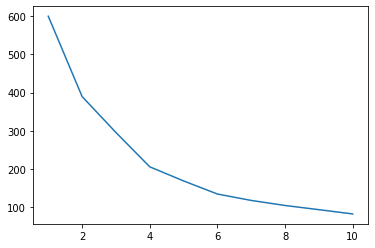

In [20]:
plt.plot(range(1,11,1),wcss)

In [21]:
kmeans = KMeans (n_clusters = 6, random_state = 0).fit(dat)
df1['cluster_2']  = kmeans.labels_   

In [22]:
df1.head()

,age,income,score,cluster_no,cluster_2
0,19,15,39,1,1
1,21,15,81,1,1
2,20,16,6,4,5
3,23,16,77,1,1
4,31,17,40,1,5


In [23]:
pd.crosstab(df1["cluster_2"],df1["cluster_no"])

cluster_no,0,1,2,3,4
cluster_2,,,,,
0,34,0,0,0,0
1,0,23,0,0,0
2,0,0,45,0,0
3,0,0,0,39,0
4,5,30,2,1,0
5,0,1,0,0,20


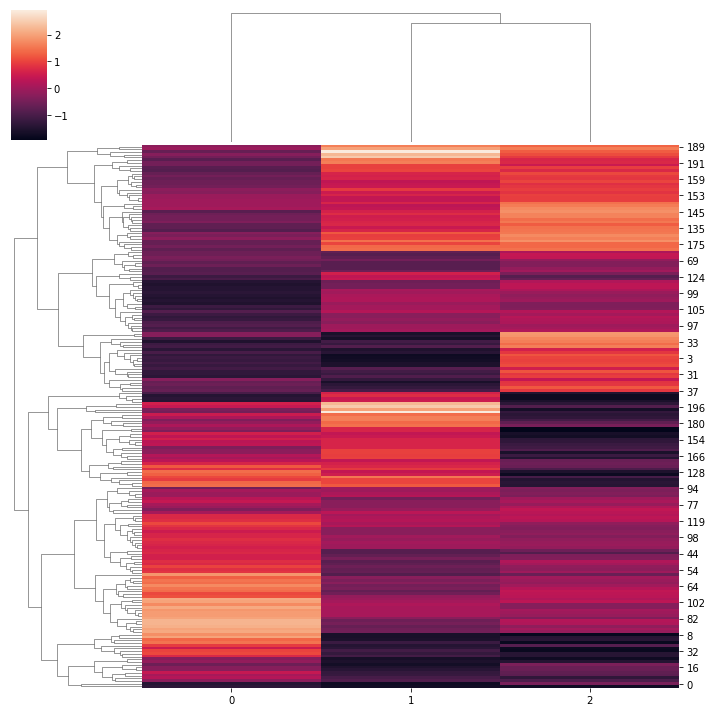

In [25]:
sns.clustermap(dat)

In [26]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
AgglomerativeClustering?

In [29]:
clustering = AgglomerativeClustering(6).fit(dat)
clustering1 = AgglomerativeClustering(5).fit(dat)

In [30]:
clustering.labels_
clustering1.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

In [32]:
df1['Cluster_6'] = clustering.labels_
df1['Cluster_5'] = clustering1.labels_

In [34]:
pd.crosstab(df1['Cluster_6'],df1['Cluster_5'])

Cluster_5,0,1,2,3,4
Cluster_6,,,,,
0,45,0,0,0,0
1,0,45,0,0,0
2,0,0,39,0,0
3,0,0,0,28,0
4,0,0,0,0,22
5,21,0,0,0,0


In [35]:
df1['Cluster_6'].value_counts()

1    45
0    45
2    39
3    28
4    22
5    21
Name: Cluster_6, dtype: int64

In [36]:
df1['Cluster_5'].value_counts()

0    66
1    45
2    39
3    28
4    22
Name: Cluster_5, dtype: int64

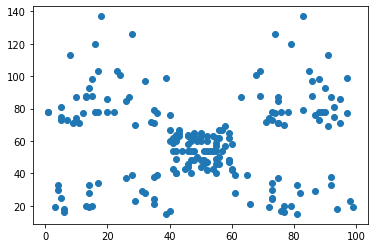

In [39]:
plt.scatter(df1['score'],df1['income'])

In [41]:
df1.groupby('Cluster_5')['age'].mean()

Cluster_5
0    26.560606
1    56.400000
2    32.692308
3    43.892857
4    44.318182
Name: age, dtype: float64

In [42]:
df1.groupby('Cluster_5')['income'].mean()

Cluster_5
0    47.363636
1    55.288889
2    86.538462
3    91.285714
4    25.772727
Name: income, dtype: float64

In [43]:
df1.groupby('Cluster_5')['score'].mean()

Cluster_5
0    56.787879
1    48.355556
2    82.128205
3    16.678571
4    20.272727
Name: score, dtype: float64

In [44]:
df1.groupby('Cluster_6')['age'].mean()

Cluster_6
0    27.377778
1    56.400000
2    32.692308
3    43.892857
4    44.318182
5    24.809524
Name: age, dtype: float64

In [46]:
df1.groupby('Cluster_6')['income'].mean()

Cluster_6
0    57.511111
1    55.288889
2    86.538462
3    91.285714
4    25.772727
5    25.619048
Name: income, dtype: float64

In [47]:
h_clusters = AgglomerativeClustering(5)

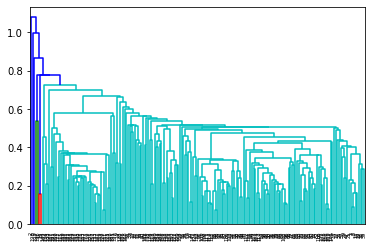

In [48]:
Z = hierarchy.linkage(dat, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)